In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
companies = pd.read_excel("Data_Science_Internship_Assignment.xlsx", sheet_name='Data')
companies.head()

,NAME,WEBSITE,TAGLINE,HQ REGION,HQ COUNTRY,HQ CITY,TAGS,LAUNCH DATE,GROWTH STAGE,LINKEDIN,TYPE
0,Airport taxi transfers Falkirk,http://airport-transfers-falkirk.co.uk,"Airport taxi transfers service in Falkirk , Sc...",Europe,United Kingdom,Falkirk,NaN,"2010, September",NaN,NaN,NaN
1,colourDNA,http://colourdna.com,Social Discovery,Europe,United Kingdom,London,NaN,"2010, September",seed stage,NaN,NaN
2,GatewayToIndia,http://gatewaytoindia.co.uk,Company which gives access to the indian web a...,Europe,United Kingdom,Weybridge,NaN,"2010, September",seed stage,https://www.linkedin.com/company/gatewaytoindia,NaN
3,IFavour,http://ifavour.co.uk,The World's First SMART 3D REALITY BILLBOARDS™...,Europe,United Kingdom,London,NaN,"2010, September",NaN,https://www.linkedin.com/company/ifavour,NaN
4,Ijatta Ltd,http://ijatta.com,"Creator of the skills finder site, which helps...",Europe,United Kingdom,Leeds,NaN,"2010, September",seed stage,https://www.linkedin.com/company/1449924/,NaN


In [3]:
companies.dtypes


NAME             object
WEBSITE          object
TAGLINE          object
HQ REGION        object
HQ COUNTRY       object
HQ CITY          object
TAGS             object
LAUNCH DATE      object
GROWTH STAGE     object
LINKEDIN         object
TYPE            float64
dtype: object

In [4]:
companies.loc[0:10, ['LAUNCH DATE']]

,LAUNCH DATE
0,"2010, September"
1,"2010, September"
2,"2010, September"
3,"2010, September"
4,"2010, September"
5,"2010, September"
6,"2010, September"
7,"2010, September"
8,"2010, October"
9,"2010, October"


In [5]:
type(companies['LAUNCH DATE'])


pandas.core.series.Series

In [6]:
#Creating new date to make launch date of type date!

In [7]:
companies['new date'] = pd.to_datetime(companies['LAUNCH DATE'])

In [8]:
#dropping unnecessary columns

In [9]:
to_drop = ['WEBSITE', 'HQ REGION', 'HQ COUNTRY', 'HQ CITY', 'LINKEDIN', 'GROWTH STAGE', 'LINKEDIN']
companies.drop(to_drop, inplace=True, axis=1)
companies.head()

,NAME,TAGLINE,TAGS,LAUNCH DATE,TYPE,new date
0,Airport taxi transfers Falkirk,"Airport taxi transfers service in Falkirk , Sc...",NaN,"2010, September",NaN,2010-09-01
1,colourDNA,Social Discovery,NaN,"2010, September",NaN,2010-09-01
2,GatewayToIndia,Company which gives access to the indian web a...,NaN,"2010, September",NaN,2010-09-01
3,IFavour,The World's First SMART 3D REALITY BILLBOARDS™...,NaN,"2010, September",NaN,2010-09-01
4,Ijatta Ltd,"Creator of the skills finder site, which helps...",NaN,"2010, September",NaN,2010-09-01


In [10]:
companies.dtypes

NAME                   object
TAGLINE                object
TAGS                   object
LAUNCH DATE            object
TYPE                  float64
new date       datetime64[ns]
dtype: object

In [11]:
companies.tail(10)

,NAME,TAGLINE,TAGS,LAUNCH DATE,TYPE,new date
11572,Sheilas' Wheels,"Car insurance, multi car insurance, home insur...",women;insurtech,2005,NaN,1970-01-01 00:00:00.000002005
11573,astrid & miyu,"We design, brand and retail contemporary costu...",women;jewellery,"2007, September",NaN,2007-09-01 00:00:00.000000000
11574,Nicholas Kirkwood Ltd,Designs and sells luxury footwear for women,women;luxury;shoes;branding;direct-to-consumer,2004,NaN,1970-01-01 00:00:00.000002004
11575,FutureProof Foundation,Award-winning not-for-profit volunteer-led org...,women;platform,2006,NaN,1970-01-01 00:00:00.000002006
11576,Vossloh Kiepe UK Limited,"Wholesale Ralph Lauren Clothing, UGG Boots, Ti...",women;shoes,2001,NaN,1970-01-01 00:00:00.000002001
11577,Academic Writing Pros,Academicwrittingpros – Just another WordPress ...,wordpress,"2007, January",NaN,2007-01-01 00:00:00.000000000
11578,The Instant Group,Specialist in independent flexible workspace s...,workspace,1999,NaN,1970-01-01 00:00:00.000001999
11579,OpenCorporates,OpenCorporates :: The Open Database Of The Cor...,world;database;data;innovation radar,2010,NaN,1970-01-01 00:00:00.000002010
11580,Affordable Dissertation,Dissertation Writing Services: Get Affordable ...,writing;dissertation,"2003, May",NaN,2003-05-01 00:00:00.000000000
11581,Real Assignment Help,UK Assignment Writing Service of Real Assignme...,writing;service,"2010, June",NaN,2010-06-01 00:00:00.000000000


In [12]:
# getting only the year of launch date, because i only need the year 

In [13]:
def test(x):
    if type(x) == str:
        return int(x[:4])
    else:
        return int(x)
companies['new date'] = companies['LAUNCH DATE'].apply(test)
companies.head(10)

,NAME,TAGLINE,TAGS,LAUNCH DATE,TYPE,new date
0,Airport taxi transfers Falkirk,"Airport taxi transfers service in Falkirk , Sc...",NaN,"2010, September",NaN,2010
1,colourDNA,Social Discovery,NaN,"2010, September",NaN,2010
2,GatewayToIndia,Company which gives access to the indian web a...,NaN,"2010, September",NaN,2010
3,IFavour,The World's First SMART 3D REALITY BILLBOARDS™...,NaN,"2010, September",NaN,2010
4,Ijatta Ltd,"Creator of the skills finder site, which helps...",NaN,"2010, September",NaN,2010
5,Mixtape Madness,Music discovery and streaming platform with ov...,NaN,"2010, September",NaN,2010
6,TinyRocketship,Creative agency that focuses on helping startu...,NaN,"2010, September",NaN,2010
7,WeSplit.it,Social finance network that allows uers to spl...,NaN,"2010, September",NaN,2010
8,Cottus Info LLC,Provides historical business data,NaN,"2010, October",NaN,2010
9,Coupobox,Web based service that allows users to scan an...,NaN,"2010, October",NaN,2010


In [14]:
companies['year_check'] = companies['new date'].apply(lambda x: 1 if x >= 1900 else 0)
companies.head(1000)

,NAME,TAGLINE,TAGS,LAUNCH DATE,TYPE,new date,year_check
0,Airport taxi transfers Falkirk,"Airport taxi transfers service in Falkirk , Sc...",NaN,"2010, September",NaN,2010,1
1,colourDNA,Social Discovery,NaN,"2010, September",NaN,2010,1
2,GatewayToIndia,Company which gives access to the indian web a...,NaN,"2010, September",NaN,2010,1
3,IFavour,The World's First SMART 3D REALITY BILLBOARDS™...,NaN,"2010, September",NaN,2010,1
4,Ijatta Ltd,"Creator of the skills finder site, which helps...",NaN,"2010, September",NaN,2010,1
...,...,...,...,...,...,...,...
995,BE Group,Independent business services group,NaN,2006,NaN,2006,1
996,BestPriceScotland,Uk company comprised of property experts that ...,NaN,2006,NaN,2006,1
997,Block Solutions,It innovation business offering expert consult...,NaN,2006,NaN,2006,1
998,Brightwork Limited,Brightwork Limited,NaN,2006,NaN,2006,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(companies[['new date']], companies['year_check'], test_size=0.3)

In [16]:
X_test

,new date
3387,2005
2859,1998
2556,2009
2401,2001
10430,2007
...,...
8717,2003
3372,2008
10476,2010
4275,2006


In [17]:
X_train

,new date
5752,2009
3114,2008
2109,2008
3626,2002
5007,2006
...,...
5034,2007
9070,2010
1955,1987
715,2009


In [18]:
#Visualizing all the companies that are established before 1900 and after 1900 (maybe that can help me with the classification?)

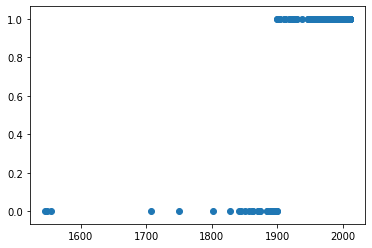

In [19]:
X = companies['new date']
Y = companies['year_check']
plt.scatter(X, Y)
plt.show()

In [20]:
# Creating logisticreg classifier 

In [21]:
logreg_clf = LogisticRegression()

In [22]:
logreg_clf.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred=logreg_clf.predict(X_test)

In [24]:
#creating confusion metric to evaluate the model

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   3,    2],
       [   0, 3470]], dtype=int64)

In [26]:
# printing the accuracy metric of the confusion metric

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9994244604316547


In [28]:
# creating randomforset classifier 

In [29]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred=clf.predict(X_test)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [32]:
# transforming the tags into arrays of word, the whole fit column now is array of arrays 

In [33]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
companies['fit'] = companies['TAGS'].apply(lambda x: vectorizer.fit(str(x).split(';')).vocabulary_ if x != 0 else []).tolist()
companies.tail(10)

,NAME,TAGLINE,TAGS,LAUNCH DATE,TYPE,new date,year_check,fit
11572,Sheilas' Wheels,"Car insurance, multi car insurance, home insur...",women;insurtech,2005,NaN,2005,1,"{'women': 1, 'insurtech': 0}"
11573,astrid & miyu,"We design, brand and retail contemporary costu...",women;jewellery,"2007, September",NaN,2007,1,"{'women': 1, 'jewellery': 0}"
11574,Nicholas Kirkwood Ltd,Designs and sells luxury footwear for women,women;luxury;shoes;branding;direct-to-consumer,2004,NaN,2004,1,"{'women': 6, 'luxury': 3, 'shoes': 4, 'brandin..."
11575,FutureProof Foundation,Award-winning not-for-profit volunteer-led org...,women;platform,2006,NaN,2006,1,"{'women': 1, 'platform': 0}"
11576,Vossloh Kiepe UK Limited,"Wholesale Ralph Lauren Clothing, UGG Boots, Ti...",women;shoes,2001,NaN,2001,1,"{'women': 1, 'shoes': 0}"
11577,Academic Writing Pros,Academicwrittingpros – Just another WordPress ...,wordpress,"2007, January",NaN,2007,1,{'wordpress': 0}
11578,The Instant Group,Specialist in independent flexible workspace s...,workspace,1999,NaN,1999,1,{'workspace': 0}
11579,OpenCorporates,OpenCorporates :: The Open Database Of The Cor...,world;database;data;innovation radar,2010,NaN,2010,1,"{'world': 4, 'database': 1, 'data': 0, 'innova..."
11580,Affordable Dissertation,Dissertation Writing Services: Get Affordable ...,writing;dissertation,"2003, May",NaN,2003,1,"{'writing': 1, 'dissertation': 0}"
11581,Real Assignment Help,UK Assignment Writing Service of Real Assignme...,writing;service,"2010, June",NaN,2010,1,"{'writing': 1, 'service': 0}"


In [34]:
X_train, X_test, y_train, y_test = train_test_split(companies[['fit']], companies['TYPE'], test_size=0.3)

In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train,y_train)

TypeError: float() argument must be a string or a number, not 'dict'

In [37]:
# trying to frop the null values 

In [38]:
tags = companies['fit'].dropna()

In [39]:
tags

0                                               {'nan': 0}
1                                               {'nan': 0}
2                                               {'nan': 0}
3                                               {'nan': 0}
4                                               {'nan': 0}
                               ...                        
11577                                     {'wordpress': 0}
11578                                     {'workspace': 0}
11579    {'world': 4, 'database': 1, 'data': 0, 'innova...
11580                    {'writing': 1, 'dissertation': 0}
11581                         {'writing': 1, 'service': 0}
Name: fit, Length: 11582, dtype: object

In [40]:
# creating tfidvectorizer to transform the tags column from array with strings to arrat with numbers

In [41]:
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform([' '.join(x) for x in tags]).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.51517173, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.88084221,
        0.        ]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, companies['TYPE'], test_size=0.3)

In [43]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [44]:
# From where i split the data into the array of tags and if i had the types i would try to predict them, but i don't know how to make the data labels.

In [45]:
clf.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
y_pred=clf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').